<a href="https://colab.research.google.com/github/glomanu/TMDLGroupProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import csv
from google.colab import files

uploaded_files = files.upload()
#create the dataframe
dfs = []
#read files


Saving market_history_monthly_2007.csv to market_history_monthly_2007 (3).csv
Saving market_history_monthly_2008.csv to market_history_monthly_2008 (3).csv
Saving market_history_monthly_2009.csv to market_history_monthly_2009 (3).csv
Saving market_history_monthly_2010.csv to market_history_monthly_2010 (3).csv
Saving market_history_monthly_2011.csv to market_history_monthly_2011 (3).csv
Saving market_history_monthly_2012.csv to market_history_monthly_2012 (3).csv
Saving market_history_monthly_2013.csv to market_history_monthly_2013 (3).csv
Saving market_history_monthly_2014.csv to market_history_monthly_2014 (3).csv
Saving market_history_monthly_2015.csv to market_history_monthly_2015 (3).csv
Saving market_history_monthly_2016.csv to market_history_monthly_2016 (3).csv
Saving market_history_monthly_2017.csv to market_history_monthly_2017 (3).csv
Saving market_history_monthly_2018.csv to market_history_monthly_2018 (3).csv
Saving market_history_monthly_2019.csv to market_history_monthly

In [ ]:
for file_name in uploaded_files.keys():
    df = pd.read_csv(file_name)
    dfs.append(df)
#merge files
merged_df = pd.concat(dfs)


In [ ]:
merged_df["Month"] = pd.to_datetime(merged_df["Month"], format="%Y-%m")

#Get only obs for NYSE(N), month and notional value
nyse_n_df = merged_df.loc[
    merged_df["Market Participant"] == "NYSE (N)",
    ["Market Participant", "Month", "Total Notional"]
]

# Drop duplicates, i was getting an error with duplicates for month
nyse_n_df = nyse_n_df.drop_duplicates(subset="Month")

#Romove obs with no data for month or total notional data
nyse_n_df = nyse_n_df.dropna(subset=["Month"])
nyse_n_df = nyse_n_df[nyse_n_df["Total Notional"] != 0]


print(nyse_n_df.head())
print(nyse_n_df.tail())

   Market Participant      Month  Total Notional
12           NYSE (N) 2011-01-01    6.497868e+11
27           NYSE (N) 2011-02-01    6.105946e+11
42           NYSE (N) 2011-03-01    7.527405e+11
57           NYSE (N) 2011-04-01    5.791401e+11
72           NYSE (N) 2011-05-01    6.776794e+11
   Market Participant      Month  Total Notional
14           NYSE (N) 2023-01-01    9.782948e+11
33           NYSE (N) 2023-02-01    9.939717e+11
52           NYSE (N) 2023-03-01    1.415257e+12
71           NYSE (N) 2023-04-01    9.003488e+11
90           NYSE (N) 2023-05-01    1.133465e+12


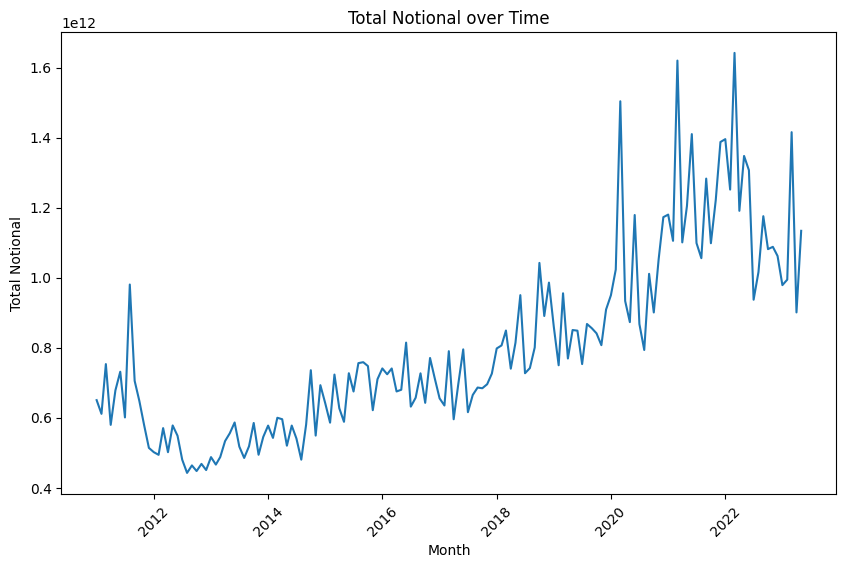

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(nyse_n_df["Month"], nyse_n_df["Total Notional"])
plt.title("Total Notional over Time")
plt.xlabel("Month")
plt.ylabel("Total Notional")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Saving data
nyse_n_df.to_excel("nyse_n_data.xlsx", index=False)
files.download("/content/nyse_n_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Apply Dickey-Fuller test for non-stationarity
from statsmodels.tsa.stattools import adfuller

notional_values = nyse_n_df["Total Notional"]

result = adfuller(notional_values)

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

Dickey-Fuller Test Results:
ADF Statistic: -0.8474871142475856
p-value: 0.8047737462208093
Critical Values:
1%: -3.4793722137854926
5%: -2.8830370378332995
10%: -2.578233635380623


In [ ]:
#Notional value is non-stationary. So, we will put in growth rates.
#put it in monthly order
nyse_n_df = nyse_n_df.sort_values("Month")

nyse_n_df["Monthly Growth"] = nyse_n_df["Total Notional"].pct_change()

print(nyse_n_df.head())

   Market Participant      Month  Total Notional  Monthly Growth
12           NYSE (N) 2011-01-01    6.497868e+11             NaN
27           NYSE (N) 2011-02-01    6.105946e+11       -0.060316
42           NYSE (N) 2011-03-01    7.527405e+11        0.232799
57           NYSE (N) 2011-04-01    5.791401e+11       -0.230625
72           NYSE (N) 2011-05-01    6.776794e+11        0.170148


In [ ]:
#Droping the first obs, as it was NaN due to the change to Monthly growth
nyse_n_df = nyse_n_df.dropna(subset=["Monthly Growth"], how="any")

# Rename
nyse_n_df = nyse_n_df.rename(columns={"Monthly Growth": "Monthly Growth Dollar Value Traded", "Total Notional": "Dollar Value Traded"})

# Print the updated dataframe
print(nyse_n_df.head())

   Market Participant      Month  Dollar Value Traded  \
27           NYSE (N) 2011-02-01         6.105946e+11   
42           NYSE (N) 2011-03-01         7.527405e+11   
57           NYSE (N) 2011-04-01         5.791401e+11   
72           NYSE (N) 2011-05-01         6.776794e+11   
87           NYSE (N) 2011-06-01         7.309292e+11   

    Monthly Growth Dollar Value Traded  
27                           -0.060316  
42                            0.232799  
57                           -0.230625  
72                            0.170148  
87                            0.078577  


Dickey-Fuller Test Results:
ADF Statistic: -2.9142371442671826
p-value: 0.043717283731658285
Critical Values:
1%: -3.4793722137854926
5%: -2.8830370378332995
10%: -2.578233635380623


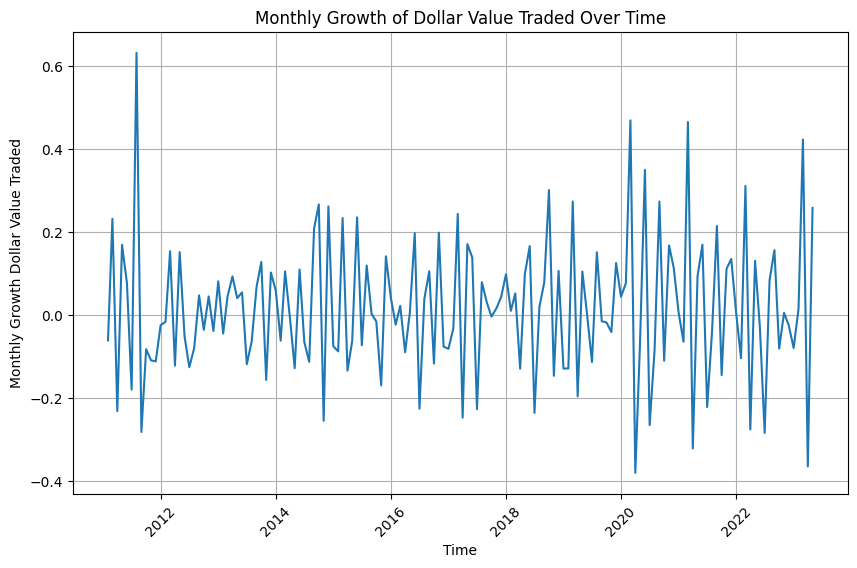

In [ ]:

#Perform the Dickey-Fuller test to check if Monthly Growth Dollar Value Traded is still non-stationary
monthly_growth = nyse_n_df["Monthly Growth Dollar Value Traded"]

result = adfuller(monthly_growth)

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

#And plot it

plt.figure(figsize=(10, 6))
plt.plot(nyse_n_df["Month"], nyse_n_df["Monthly Growth Dollar Value Traded"])
plt.xlabel("Time")
plt.ylabel("Monthly Growth Dollar Value Traded")
plt.title("Monthly Growth of Dollar Value Traded Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Monthly Growth Dollar Value Traded is non-stationary and will be used for the rest of the analysis.

In [ ]:
#Re-download this updated dateset
nyse_n_df.to_excel("nyse_n_data.xlsx", index=False)
files.download("/content/nyse_n_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Fixing inflation file
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import csv
from google.colab import files
nyse_n_df = pd.read_excel("nyse_inflation.xlsx")
print(nyse_n_df)

    Market Participant      Month  Dollar Value Traded  \
0             NYSE (N) 2011-02-01         6.105946e+11   
1             NYSE (N) 2011-03-01         7.527405e+11   
2             NYSE (N) 2011-04-01         5.791401e+11   
3             NYSE (N) 2011-05-01         6.776794e+11   
4             NYSE (N) 2011-06-01         7.309292e+11   
..                 ...        ...                  ...   
143           NYSE (N) 2023-01-01         9.782948e+11   
144           NYSE (N) 2023-02-01         9.939717e+11   
145           NYSE (N) 2023-03-01         1.415257e+12   
146           NYSE (N) 2023-04-01         9.003488e+11   
147           NYSE (N) 2023-05-01         1.133465e+12   

     Monthly Growth Dollar Value Traded  
0                             -0.060316  
1                              0.232799  
2                             -0.230625  
3                              0.170148  
4                              0.078577  
..                                  ...  
143      

In [ ]:
#Load inflation data
#I already had to make this data more readable in excel before importing

file_path = '/content/Inflation modified.xlsx'
inflation_data = pd.read_excel(file_path)
print(inflation_data.head())

       Month  Inflation
0 2013-01-01        1.9
1 2013-02-01        2.0
2 2013-03-01        1.9
3 2013-04-01        1.7
4 2013-05-01        1.7


In [ ]:
#merge
nyse_inflation = pd.merge(nyse_n_df, inflation_data, on="Month", how="left")
print(nyse_inflation.head())
print(nyse_inflation.tail())

  Market Participant      Month  Dollar Value Traded  \
0           NYSE (N) 2011-02-01         6.105946e+11   
1           NYSE (N) 2011-03-01         7.527405e+11   
2           NYSE (N) 2011-04-01         5.791401e+11   
3           NYSE (N) 2011-05-01         6.776794e+11   
4           NYSE (N) 2011-06-01         7.309292e+11   

   Monthly Growth Dollar Value Traded  Inflation  
0                           -0.060316        NaN  
1                            0.232799        NaN  
2                           -0.230625        NaN  
3                            0.170148        NaN  
4                            0.078577        NaN  
    Market Participant      Month  Dollar Value Traded  \
143           NYSE (N) 2023-01-01         9.782948e+11   
144           NYSE (N) 2023-02-01         9.939717e+11   
145           NYSE (N) 2023-03-01         1.415257e+12   
146           NYSE (N) 2023-04-01         9.003488e+11   
147           NYSE (N) 2023-05-01         1.133465e+12   

     Mon

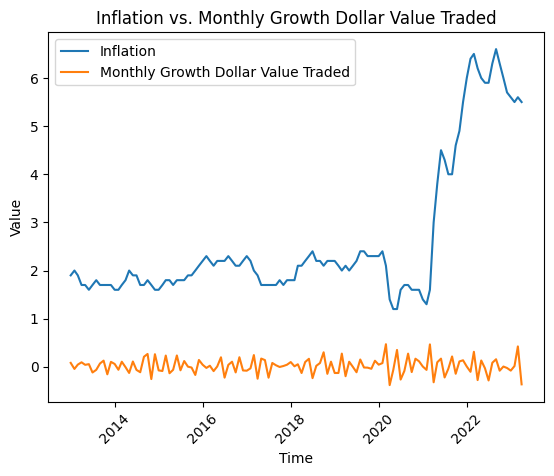

In [ ]:

# taking off observations with no data for inflation
filtered_data = nyse_inflation.dropna(subset=["Inflation"])
#plot
plt.plot(filtered_data["Month"], filtered_data["Inflation"], label="Inflation")
plt.plot(filtered_data["Month"], filtered_data["Monthly Growth Dollar Value Traded"], label="Monthly Growth Dollar Value Traded")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Inflation vs. Monthly Growth Dollar Value Traded")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Save and download the data
nyse_inflation.to_excel("nyse_inflation_final.xlsx", index=False)
files.download("/content/nyse_inflation_final.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#loggin on to the dataset again, so we don't have to re-run everything
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import csv
from google.colab import files
nyse_inflation = pd.read_excel("nyse_inflation_final.xlsx")
print(nyse_inflation)

    Market Participant      Month  Dollar Value Traded  \
0             NYSE (N) 2011-02-01         6.105946e+11   
1             NYSE (N) 2011-03-01         7.527405e+11   
2             NYSE (N) 2011-04-01         5.791401e+11   
3             NYSE (N) 2011-05-01         6.776794e+11   
4             NYSE (N) 2011-06-01         7.309292e+11   
..                 ...        ...                  ...   
143           NYSE (N) 2023-01-01         9.782948e+11   
144           NYSE (N) 2023-02-01         9.939717e+11   
145           NYSE (N) 2023-03-01         1.415257e+12   
146           NYSE (N) 2023-04-01         9.003488e+11   
147           NYSE (N) 2023-05-01         1.133465e+12   

     Monthly Growth Dollar Value Traded  Inflation  
0                             -0.060316        NaN  
1                              0.232799        NaN  
2                             -0.230625        NaN  
3                              0.170148        NaN  
4                              0.07857

0      -6.031550
1      23.279927
2     -23.062452
3      17.014765
4       7.857667
         ...    
143    -7.850232
144     1.602481
145    42.383994
146   -36.382647
147    25.891780
Name: Monthly Growth Dollar Value Traded, Length: 148, dtype: float64


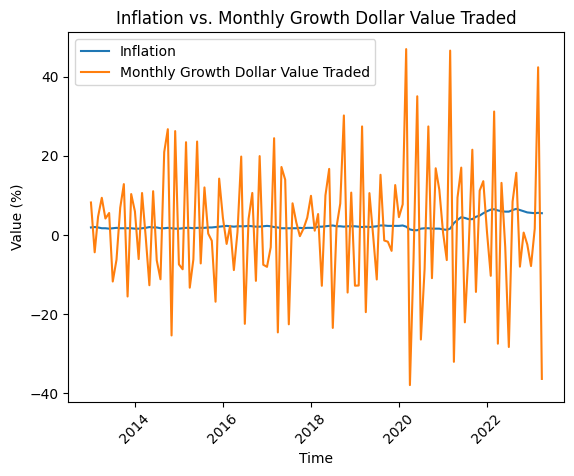

In [ ]:
nyse_inflation["Monthly Growth Dollar Value Traded"] = nyse_inflation["Monthly Growth Dollar Value Traded"] * 100
print(nyse_inflation["Monthly Growth Dollar Value Traded"])

filtered_data = nyse_inflation.dropna(subset=["Inflation"])
#plot
plt.plot(filtered_data["Month"], filtered_data["Inflation"], label="Inflation")
plt.plot(filtered_data["Month"], filtered_data["Monthly Growth Dollar Value Traded"], label="Monthly Growth Dollar Value Traded")
plt.xlabel("Time")
plt.ylabel("Value (%)")
plt.title("Inflation vs. Monthly Growth Dollar Value Traded")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#we found better inflation data on Compustat, so we are gonna replace it, abd add 1 treasury bonds returns
treasury_inflation = pd.read_excel("Treasury and inflation.xlsx")
print(treasury_inflation.head())

       caldt     b1ret     b1ind    cpiret  cpiind
0 2007-01-31  0.003995  1103.626  0.003053   476.3
1 2007-02-28  0.005063  1109.214  0.005350   478.8
2 2007-03-30  0.003904  1113.544  0.009106   483.2
3 2007-04-30  0.003403  1117.334  0.006496   486.3
4 2007-05-31  0.002538  1120.170  0.006111   489.3


In [ ]:
treasury_inflation = treasury_inflation[['caldt', 'b1ret', 'cpiret']]
print(treasury_inflation.head())

       caldt     b1ret    cpiret
0 2007-01-31  0.003995  0.003053
1 2007-02-28  0.005063  0.005350
2 2007-03-30  0.003904  0.009106
3 2007-04-30  0.003403  0.006496
4 2007-05-31  0.002538  0.006111


In [ ]:
#Data for b1ret and cpiret from the end of last month will be matched to the current month
treasury_inflation['caldt'] = pd.to_datetime(treasury_inflation['caldt']) + pd.offsets.MonthBegin(1)
print(treasury_inflation.head())

       caldt     b1ret    cpiret
0 2007-02-01  0.003995  0.003053
1 2007-03-01  0.005063  0.005350
2 2007-04-01  0.003904  0.009106
3 2007-05-01  0.003403  0.006496
4 2007-06-01  0.002538  0.006111


In [ ]:
treasury_inflation = treasury_inflation.rename(columns={'caldt': 'Month', 'b1ret': '1y_bond_return', 'cpiret': 'mon_inflation'})
print(treasury_inflation.head())


       Month  1y_bond_return  mon_inflation
0 2007-02-01        0.003995       0.003053
1 2007-03-01        0.005063       0.005350
2 2007-04-01        0.003904       0.009106
3 2007-05-01        0.003403       0.006496
4 2007-06-01        0.002538       0.006111


In [ ]:
#times 100 so it is in %
treasury_inflation['1y_bond_return'] = treasury_inflation['1y_bond_return'] * 100
treasury_inflation['mon_inflation'] = treasury_inflation['mon_inflation'] * 100
print(treasury_inflation.head())

       Month  1y_bond_return  mon_inflation
0 2007-02-01          0.3995         0.3053
1 2007-03-01          0.5063         0.5350
2 2007-04-01          0.3904         0.9106
3 2007-05-01          0.3403         0.6496
4 2007-06-01          0.2538         0.6111


In [ ]:
#Save and download the data
treasury_inflation.to_excel("Bonds and inflation.xlsx", index=False)
files.download("/content/Bonds and inflation.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Adding the GDP, done by Semir on another file

#Download the GDP dataset
df_gdp = pd.read_excel("US-Monthly-GDP-History-Data.xlsx", sheet_name="Data")

#From Nominal GDP calculate GDP Growth (in %)
growth = []
for i in range(len(df_gdp)):
  if i == 0:
    growth.append("No Val")
  else:
    growth.append(((df_gdp.iloc[i,1]/df_gdp.iloc[i-1,1])-1)*100)

df_gdp['Monthly Nominal GDP Growth'] = growth
print(df_gdp)

#2 Values missing (04/2023 onwards)...exlude them from the whole dataset?

#Save and download the data
nyse_gdp.to_excel("nyse_gdp.xlsx", index=False)
files.download("/content/nyse_gdp.xlsx")

In [ ]:
#Re-initializing the data
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import csv
from google.colab import files

main_df = pd.read_excel("nyse_gdp.xlsx")
print(main_df)

    Market Participant      Month  Dollar Value Traded  \
0             NYSE (N) 2011-02-01         6.105946e+11   
1             NYSE (N) 2011-03-01         7.527405e+11   
2             NYSE (N) 2011-04-01         5.791401e+11   
3             NYSE (N) 2011-05-01         6.776794e+11   
4             NYSE (N) 2011-06-01         7.309292e+11   
..                 ...        ...                  ...   
143           NYSE (N) 2023-01-01         9.782948e+11   
144           NYSE (N) 2023-02-01         9.939717e+11   
145           NYSE (N) 2023-03-01         1.415257e+12   
146           NYSE (N) 2023-04-01         9.003488e+11   
147           NYSE (N) 2023-05-01         1.133465e+12   

     Monthly Growth Dollar Value Traded  Inflation  Monthly Nominal GDP Growth  
0                             -0.060316        NaN                    0.160979  
1                              0.232799        NaN                    1.522931  
2                             -0.230625        NaN          

In [ ]:
main_df = main_df.rename(columns={'Monthly Nominal GDP Growth': 'real_gdp_growth'})
print(main_df)

    Market Participant      Month  Dollar Value Traded  \
0             NYSE (N) 2011-02-01         6.105946e+11   
1             NYSE (N) 2011-03-01         7.527405e+11   
2             NYSE (N) 2011-04-01         5.791401e+11   
3             NYSE (N) 2011-05-01         6.776794e+11   
4             NYSE (N) 2011-06-01         7.309292e+11   
..                 ...        ...                  ...   
143           NYSE (N) 2023-01-01         9.782948e+11   
144           NYSE (N) 2023-02-01         9.939717e+11   
145           NYSE (N) 2023-03-01         1.415257e+12   
146           NYSE (N) 2023-04-01         9.003488e+11   
147           NYSE (N) 2023-05-01         1.133465e+12   

     Monthly Growth Dollar Value Traded  Inflation  real_gdp_growth  
0                             -0.060316        NaN         0.160979  
1                              0.232799        NaN         1.522931  
2                             -0.230625        NaN         0.448997  
3                      

In [ ]:
#make it time series
main_df['Month'] = pd.to_datetime(main_df['Month'])
main_df.set_index('Month', inplace=True)
print(main_df.head())


           Market Participant  Dollar Value Traded  \
Month                                                
2011-02-01           NYSE (N)         6.105946e+11   
2011-03-01           NYSE (N)         7.527405e+11   
2011-04-01           NYSE (N)         5.791401e+11   
2011-05-01           NYSE (N)         6.776794e+11   
2011-06-01           NYSE (N)         7.309292e+11   

            Monthly Growth Dollar Value Traded  Inflation  real_gdp_growth  
Month                                                                       
2011-02-01                           -0.060316        NaN         0.160979  
2011-03-01                            0.232799        NaN         1.522931  
2011-04-01                           -0.230625        NaN         0.448997  
2011-05-01                            0.170148        NaN        -0.112904  
2011-06-01                            0.078577        NaN        -0.292610  


In [ ]:
#adding 1y treasy yields and new inflation data
treasury_inflation = pd.read_excel("Bonds and inflation.xlsx")
treasury_inflation.set_index('Month', inplace=True)
treasury_inflation.index = pd.to_datetime(treasury_inflation.index)

# Print the updated DataFrame
print(treasury_inflation.head())

            1y_bond_return  mon_inflation
Month                                    
2007-02-01          0.3995         0.3053
2007-03-01          0.5063         0.5350
2007-04-01          0.3904         0.9106
2007-05-01          0.3403         0.6496
2007-06-01          0.2538         0.6111


In [ ]:
#merge and drop old inflation data
main_df = main_df.merge(treasury_inflation, left_index=True, right_index=True, how='left')
#re-run, inflation already droped
main_df = main_df.drop('Inflation', axis=1)
main_df = main_df.rename(columns={'Monthly Growth Dollar Value Traded': 'mon_trad_vol_g'})
print(main_df.head())


           Market Participant  Dollar Value Traded  mon_trad_vol_g  \
Month                                                                
2011-02-01           NYSE (N)         6.105946e+11       -0.060316   
2011-03-01           NYSE (N)         7.527405e+11        0.232799   
2011-04-01           NYSE (N)         5.791401e+11       -0.230625   
2011-05-01           NYSE (N)         6.776794e+11        0.170148   
2011-06-01           NYSE (N)         7.309292e+11        0.078577   

            real_gdp_growth  1y_bond_return  mon_inflation  
Month                                                       
2011-02-01         0.160979          0.1078         0.4763  
2011-03-01         1.522931          0.0241         0.4931  
2011-04-01         0.448997          0.0077         0.9751  
2011-05-01        -0.112904          0.0672         0.6439  
2011-06-01        -0.292610          0.1021         0.4704  


In [ ]:
main_df.to_excel("checkpoint1.xlsx", index=False)
files.download("/content/checkpoint1.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
#adding S&P data
sp500 = pd.read_excel("S&P500.xlsx")
print(sp500.head())

   gvkeyx  epsx12    prccm   datadate              conm
0       3   83.10  1438.24 2007-01-31  S&P 500 Comp-Ltd
1       3   83.10  1406.82 2007-02-28  S&P 500 Comp-Ltd
2       3   84.78  1420.86 2007-03-31  S&P 500 Comp-Ltd
3       3   84.78  1482.37 2007-04-30  S&P 500 Comp-Ltd
4       3   84.78  1530.62 2007-05-31  S&P 500 Comp-Ltd


In [102]:
sp500 = sp500.drop('gvkeyx', axis = 1)
sp500 = sp500.drop('conm', axis = 1)
print(sp500.head())

   epsx12    prccm   datadate
0   83.10  1438.24 2007-01-31
1   83.10  1406.82 2007-02-28
2   84.78  1420.86 2007-03-31
3   84.78  1482.37 2007-04-30
4   84.78  1530.62 2007-05-31


In [103]:
sp500['datadate'] = pd.to_datetime(sp500['datadate'])
sp500['datadate'] = sp500['datadate'] + pd.offsets.MonthBegin(1)
sp500.set_index('datadate', inplace=True)
sp500.index = pd.to_datetime(sp500.index)
print(sp500.head())

            epsx12    prccm
datadate                   
2007-02-01   83.10  1438.24
2007-03-01   83.10  1406.82
2007-04-01   84.78  1420.86
2007-05-01   84.78  1482.37
2007-06-01   84.78  1530.62


In [104]:
sp500 = sp500.rename(columns={'epsx12': 'EPS', 'prccm': 'price_clo'})
print(sp500.head())


              EPS  price_clo
datadate                    
2007-02-01  83.10    1438.24
2007-03-01  83.10    1406.82
2007-04-01  84.78    1420.86
2007-05-01  84.78    1482.37
2007-06-01  84.78    1530.62


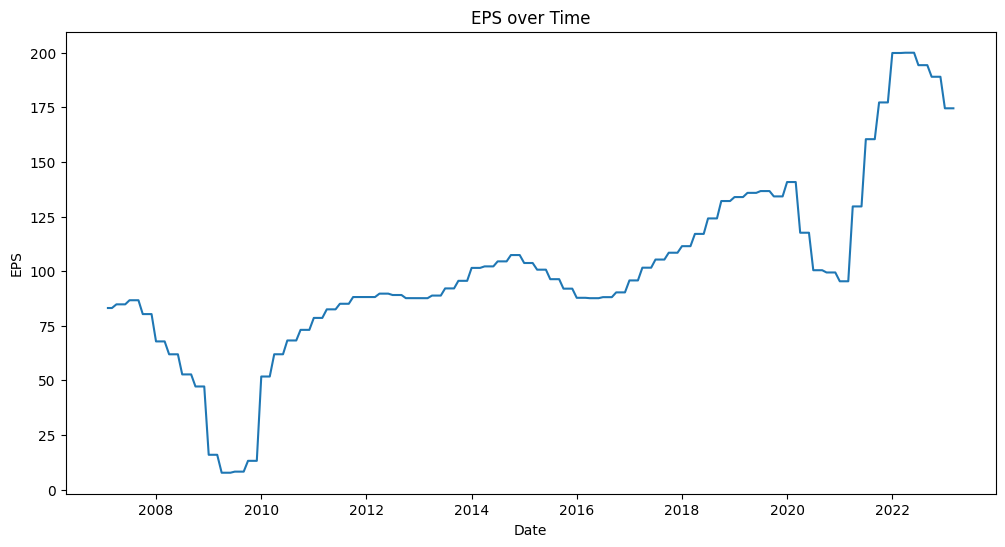

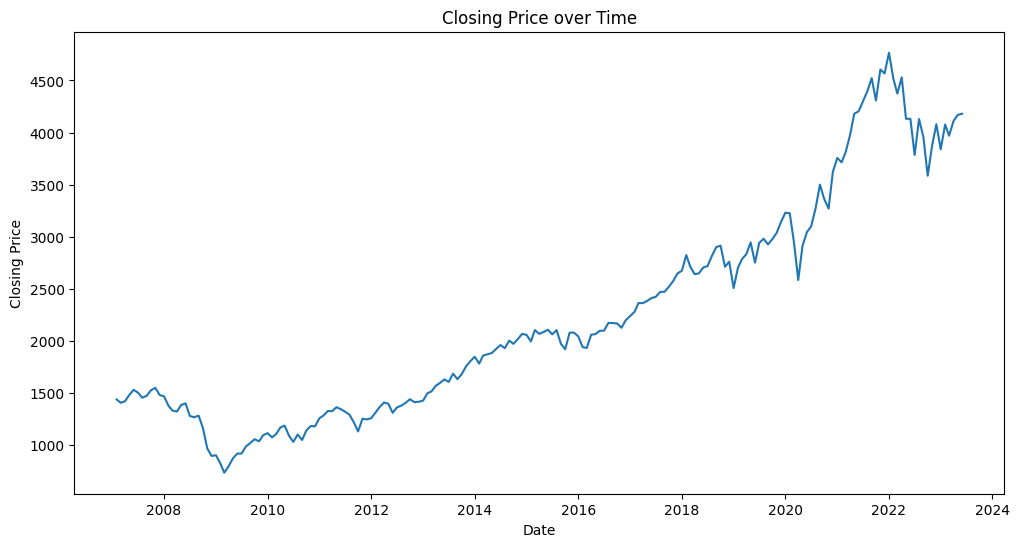

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['EPS'])
plt.title('EPS over Time')
plt.xlabel('Date')
plt.ylabel('EPS')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['price_clo'])
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [106]:
#dickey-fuller tests
from statsmodels.tsa.stattools import adfuller

eps_values = sp500['EPS']
price_clo_values = sp500['price_clo']

eps_values = eps_values.replace([np.inf, -np.inf], np.nan).dropna()
price_clo_values = price_clo_values.replace([np.inf, -np.inf], np.nan).dropna()


result_eps = adfuller(eps_values)
result_price_clo = adfuller(price_clo_values)


print('Dickey-Fuller Test Results for EPS:')
print(f'Test Statistic: {result_eps[0]}')
print(f'p-value: {result_eps[1]}')
print('Critical Values:')
for key, value in result_eps[4].items():
    print(f'{key}: {value}')

print('Dickey-Fuller Test Results for Closing Price:')
print(f'Test Statistic: {result_price_clo[0]}')
print(f'p-value: {result_price_clo[1]}')
print('Critical Values:')
for key, value in result_price_clo[4].items():
    print(f'{key}: {value}')

Dickey-Fuller Test Results for EPS:
Test Statistic: -0.7032577661437834
p-value: 0.8459038974336681
Critical Values:
1%: -3.467631519151906
5%: -2.8779183721695567
10%: -2.575501353364474
Dickey-Fuller Test Results for Closing Price:
Test Statistic: 1.3135651348169837
p-value: 0.9966838184366011
Critical Values:
1%: -3.4668001583460613
5%: -2.8775552336674317
10%: -2.5753075498128246


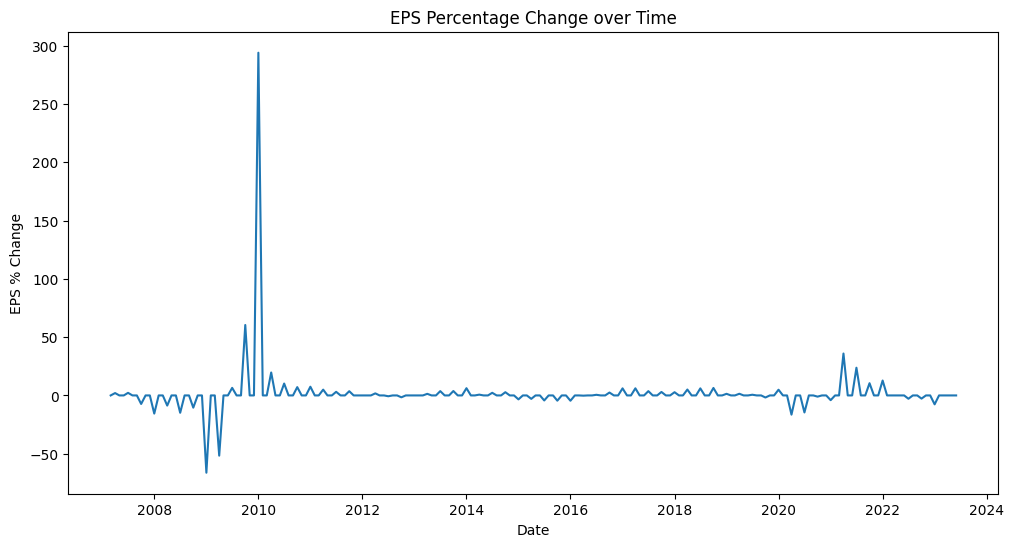

Dickey-Fuller Test Results for EPS Percentage Change:
Test Statistic: -5.898125352596901
p-value: 2.8196006343929906e-07
Critical Values:
1%: -3.4646940755442612
5%: -2.8766348847254934
10%: -2.5748163958763994


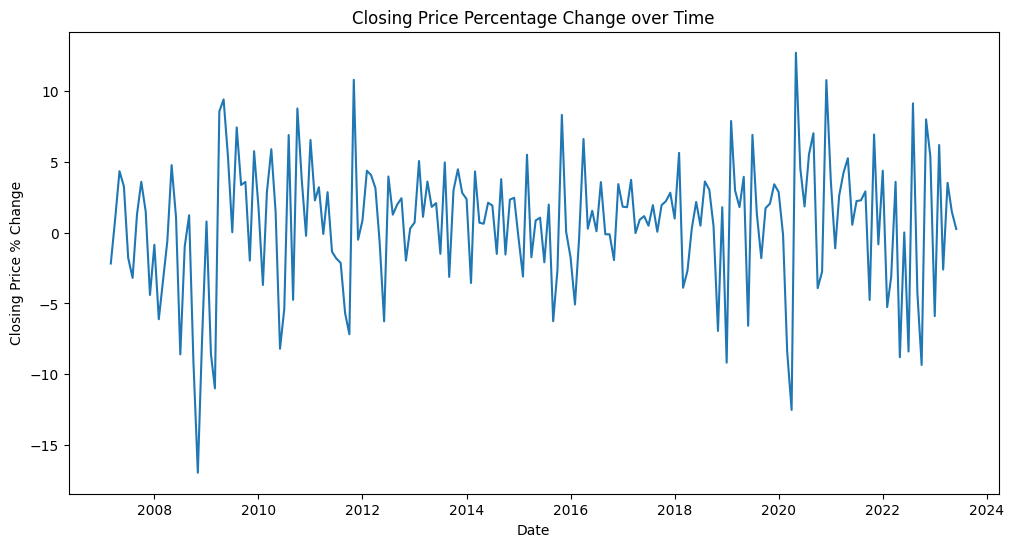

Dickey-Fuller Test Results for Closing Price Percentage Change:
Test Statistic: -5.780083993954196
p-value: 5.150124543314263e-07
Critical Values:
1%: -3.4652439354133255
5%: -2.8768752281673717
10%: -2.574944653739612


In [107]:
#both non-stationary, use their growth instead

sp500['EPS_pct_change'] = sp500['EPS'].pct_change() * 100
sp500['price_clo_pct_change'] = sp500['price_clo'].pct_change() * 100


plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['EPS_pct_change'])
plt.title('EPS Percentage Change over Time')
plt.xlabel('Date')
plt.ylabel('EPS % Change')
plt.show()

# DF eps %
result_eps_pct_change = adfuller(sp500['EPS_pct_change'].dropna())
print('Dickey-Fuller Test Results for EPS Percentage Change:')
print(f'Test Statistic: {result_eps_pct_change[0]}')
print(f'p-value: {result_eps_pct_change[1]}')
print('Critical Values:')
for key, value in result_eps_pct_change[4].items():
    print(f'{key}: {value}')

plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['price_clo_pct_change'])
plt.title('Closing Price Percentage Change over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price % Change')
plt.show()

# DF price_clo in %
result_price_clo_pct_change = adfuller(sp500['price_clo_pct_change'].dropna())
print('Dickey-Fuller Test Results for Closing Price Percentage Change:')
print(f'Test Statistic: {result_price_clo_pct_change[0]}')
print(f'p-value: {result_price_clo_pct_change[1]}')
print('Critical Values:')
for key, value in result_price_clo_pct_change[4].items():
    print(f'{key}: {value}')

**PROBLEM:** EPS IS IN quarterly
IDEA: instead of using EPS, using a dummy for the earnings season, when EPS data is updated and thus its change is different than 0 (End of each quarter)


In [108]:
#both are now stationary. Add to main_df
#PROBLEM: EPS IS IN QUARTERS -> DROP

sp500['EPS_pct_change_dummy'] = sp500['EPS_pct_change'].apply(lambda x: 1 if x != 0 else 0)
sp500.drop(['EPS', 'EPS_pct_change'], axis=1, inplace=True)
print(sp500.head())

            price_clo  price_clo_pct_change  EPS_pct_change_dummy
datadate                                                         
2007-02-01    1438.24                   NaN                     1
2007-03-01    1406.82             -2.184615                     0
2007-04-01    1420.86              0.997995                     1
2007-05-01    1482.37              4.329068                     0
2007-06-01    1530.62              3.254923                     0


In [109]:

print(sp500)

            price_clo  price_clo_pct_change  EPS_pct_change_dummy
datadate                                                         
2007-02-01    1438.24                   NaN                     1
2007-03-01    1406.82             -2.184615                     0
2007-04-01    1420.86              0.997995                     1
2007-05-01    1482.37              4.329068                     0
2007-06-01    1530.62              3.254923                     0
...               ...                   ...                   ...
2023-02-01    4076.60              6.175283                     0
2023-03-01    3970.15             -2.611245                     0
2023-04-01    4109.31              3.505157                     0
2023-05-01    4169.48              1.464236                     0
2023-06-01    4179.83              0.248232                     0

[197 rows x 3 columns]


In [100]:
#I struggled a lot with the dates here. I managed to fix it earlier in the code
#sp500['datadate'] = pd.to_datetime(sp500['datadate'])
#sp500['datadate'] = sp500['datadate'] - pd.DateOffset(months=1)
#sp500['datadate'] = sp500['datadate'].dt.strftime('%Y-%m')
#print(sp500.head())





TypeError: ignored

In [ ]:
sp500.to_excel('sp500_data.xlsx', index=True)
files.download('sp500_data.xlsx')

**NOTE**: Inflation is the inflation of the last month. The same is true for bond returns.
I'll fix that now, but we will prob still use lagged inflation since inflation for the month is only known ex post

In [110]:
#Add price_clo, price_clo_pct_change and EPS_pct_change_dummy to main_dr
# Merge columns from sp500 into main_df
merged_main_df = main_df.merge(sp500[['price_clo', 'price_clo_pct_change', 'EPS_pct_change_dummy']], left_index=True, right_index=True, how='left')
print(merged_main_df)

           Market Participant  Dollar Value Traded  mon_trad_vol_g  \
Month                                                                
2011-02-01           NYSE (N)         6.105946e+11       -0.060316   
2011-03-01           NYSE (N)         7.527405e+11        0.232799   
2011-04-01           NYSE (N)         5.791401e+11       -0.230625   
2011-05-01           NYSE (N)         6.776794e+11        0.170148   
2011-06-01           NYSE (N)         7.309292e+11        0.078577   
...                       ...                  ...             ...   
2023-01-01           NYSE (N)         9.782948e+11       -0.078502   
2023-02-01           NYSE (N)         9.939717e+11        0.016025   
2023-03-01           NYSE (N)         1.415257e+12        0.423840   
2023-04-01           NYSE (N)         9.003488e+11       -0.363826   
2023-05-01           NYSE (N)         1.133465e+12        0.258918   

            real_gdp_growth  1y_bond_return  mon_inflation  price_clo  \
Month           

In [115]:
#fixing bond and inflation
merged_main_df['1y_bond_return'] = merged_main_df['1y_bond_return'].shift(-1)
merged_main_df['mon_inflation'] = merged_main_df['mon_inflation'].shift(-1)

print(merged_main_df.head())



           Market Participant  Dollar Value Traded  mon_trad_vol_g  \
Month                                                                
2011-02-01           NYSE (N)         6.105946e+11       -0.060316   
2011-03-01           NYSE (N)         7.527405e+11        0.232799   
2011-04-01           NYSE (N)         5.791401e+11       -0.230625   
2011-05-01           NYSE (N)         6.776794e+11        0.170148   
2011-06-01           NYSE (N)         7.309292e+11        0.078577   

            real_gdp_growth  1y_bond_return  mon_inflation  price_clo  \
Month                                                                   
2011-02-01         0.160979          0.0241         0.4931    1286.12   
2011-03-01         1.522931          0.0077         0.9751    1327.22   
2011-04-01         0.448997          0.0672         0.6439    1325.83   
2011-05-01        -0.112904          0.1021         0.4704    1363.61   
2011-06-01        -0.292610          0.0198        -0.1071    1345.20  

In [119]:
merged_main_df["mon_trad_vol_g"] = merged_main_df["mon_trad_vol_g"] * 100
print(merged_main_df.tail(12))

           Market Participant  Dollar Value Traded  mon_trad_vol_g  \
Month                                                                
2022-06-01           NYSE (N)         1.306600e+12       -3.024899   
2022-07-01           NYSE (N)         9.366052e+11      -28.317400   
2022-08-01           NYSE (N)         1.015563e+12        8.430177   
2022-09-01           NYSE (N)         1.175228e+12       15.721896   
2022-10-01           NYSE (N)         1.081154e+12       -8.004771   
2022-11-01           NYSE (N)         1.087724e+12        0.607705   
2022-12-01           NYSE (N)         1.061636e+12       -2.398456   
2023-01-01           NYSE (N)         9.782948e+11       -7.850232   
2023-02-01           NYSE (N)         9.939717e+11        1.602481   
2023-03-01           NYSE (N)         1.415257e+12       42.383994   
2023-04-01           NYSE (N)         9.003488e+11      -36.382647   
2023-05-01           NYSE (N)         1.133465e+12       25.891780   

            real_gd

In [120]:
merged_main_df.to_excel('checkpoint_final_data.xlsx', index=False)
